In [1]:
#from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#mongo db connect library
from pymongo import MongoClient
from random import randint

In [2]:
# database name
db_name= 'test_col1'

# table or collection name
collection_name = 'col1'

#Step 1: Connect to MongoDB - Note: Change connection string as needed
client = MongoClient(port=27017)
db=client[db_name]

In [3]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'test_col1')

In [4]:
# convert mongo db json data into pandas dataframe
data= pd.DataFrame(list(db[collection_name].find()))

In [5]:
df = data

In [6]:
#df.info()

In [7]:
df.head()

,_id,Row transaction type,Item code,Prefix,Warehouse code,Warehouse group code,Sales Order Number,Sales Order Line Number,Extraction date,Ordered/requested quantity,...,Free text 1,Free text 2,Free text 3,Free text 4,Free text 5,use for sales value KPI,Demand stream,Direct demand,order date,fil_name
0,5ecbf8080b7cac9fce9ef56d,M,402066352R,RE,27611782,27611782,26386,4,20191001T1905,2,...,S,F,11909425,NaN,NaN,NaN,CATEL,NaN,NaN,27611782_TRANSACTIONAL_DEMAND_DELTA_20191001_2...
1,5ecbf8080b7cac9fce9ef56e,M,410601073R,RE,27611782,27611782,26386,5,20191001T1905,1,...,S,F,11909425,NaN,NaN,NaN,CATEL,NaN,NaN,27611782_TRANSACTIONAL_DEMAND_DELTA_20191001_2...
2,5ecbf8080b7cac9fce9ef56f,M,440607091R,RE,27611782,27611782,26386,8,20191001T1905,1,...,S,F,11909425,NaN,NaN,NaN,CATEL,NaN,NaN,27611782_TRANSACTIONAL_DEMAND_DELTA_20191001_2...
3,5ecbf8080b7cac9fce9ef570,M,152089599R,RE,27611782,27611782,25815,2,20191001T1905,1,...,S,F,11909426,NaN,NaN,NaN,CATEL,NaN,NaN,27611782_TRANSACTIONAL_DEMAND_DELTA_20191001_2...
4,5ecbf8080b7cac9fce9ef571,M,110265505R,RE,27611782,27611782,25815,3,20191001T1905,1,...,S,F,11909426,NaN,NaN,NaN,CATEL,NaN,NaN,27611782_TRANSACTIONAL_DEMAND_DELTA_20191001_2...


In [8]:
# delete un-wanted columns in the data
df = df.drop(["_id", "Prefix", "Warehouse group code", "Free text 1","Free text 2","Free text 3","Free text 4","Free text 5","Demand stream","Direct demand", "fil_name","Customer code","Use for service level","Use for classic level","Stock at demand date","use for sales value KPI", "order date"], axis=1)

# Rename multiple columns in one go with a larger dictionary
df.rename(
    columns={
        "Warehouse code":"warehouse_code",
        "Ordered/requested quantity": "order_req_qty",
        "Delivered/supplied quantity": "delivered_resp_qty",
        "Demand Date":"demand_date",
        "Item code":"item_code",
        "Row transaction type":"row_txn_type",
        "Sales Order Number":"sales_order_number",
        "Sales Order Line Number":"sales_order_line_number",
        "Extraction date":"extraction_date",
        "Use for forecasting":"use_for_forecasting"
    },
    inplace=True
)

In [9]:
#df.drop_duplicates();
#df.drop_duplicates(keep=False,inplace=True) 

# using dictionary to convert specific columns 
convert_dict = {'order_req_qty': int, 'delivered_resp_qty':int}  
df = df.astype(convert_dict) 

In [10]:
df.head()

,row_txn_type,item_code,warehouse_code,sales_order_number,sales_order_line_number,extraction_date,order_req_qty,delivered_resp_qty,demand_date,use_for_forecasting
0,M,402066352R,27611782,26386,4,20191001T1905,2,2,20190902,Y
1,M,410601073R,27611782,26386,5,20191001T1905,1,1,20190902,Y
2,M,440607091R,27611782,26386,8,20191001T1905,1,1,20190902,Y
3,M,152089599R,27611782,25815,2,20191001T1905,1,1,20190902,Y
4,M,110265505R,27611782,25815,3,20191001T1905,1,1,20190902,Y


In [11]:
df = df.drop(["warehouse_code","delivered_resp_qty","row_txn_type","sales_order_number","sales_order_line_number","extraction_date","use_for_forecasting"], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483409 entries, 0 to 483408
Data columns (total 3 columns):
item_code        483409 non-null object
order_req_qty    483409 non-null int32
demand_date      483409 non-null object
dtypes: int32(1), object(2)
memory usage: 9.2+ MB


In [13]:
df['demand_date']=pd.to_datetime(df['demand_date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483409 entries, 0 to 483408
Data columns (total 3 columns):
item_code        483409 non-null object
order_req_qty    483409 non-null int32
demand_date      483409 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.2+ MB


In [15]:
df.head()

,item_code,order_req_qty,demand_date
0,402066352R,2,2019-09-02
1,410601073R,1,2019-09-02
2,440607091R,1,2019-09-02
3,152089599R,1,2019-09-02
4,110265505R,1,2019-09-02


In [16]:
#df = df.groupby(['demand_date','part'],as_index=False).agg({'req_qty': 'sum'})
df = df.groupby(['demand_date','item_code'], as_index=False).agg({'order_req_qty': 'sum'})

In [17]:
df.head(5)

,demand_date,item_code,order_req_qty
0,2019-09-02,1102601M02,1
1,2019-09-02,110265505R,4
2,2019-09-02,117201627R,1
3,2019-09-02,123091465R,1
4,2019-09-02,135027147R,1


In [18]:
# date as an index
df.set_index('demand_date', inplace=True)

In [19]:
df.head()

,item_code,order_req_qty
demand_date,,
2019-09-02,1102601M02,1
2019-09-02,110265505R,4
2019-09-02,117201627R,1
2019-09-02,123091465R,1
2019-09-02,135027147R,1


In [20]:
groupby_data=df.groupby("item_code")['item_code'].count()
groupby_data=groupby_data.sort_values(ascending=False)
groupby_data

item_code
7703062062    148
110265505R    128
152095084R    113
7711220016    106
7703097516     93
             ... 
7711236340      1
7711237296      1
7711238968      1
7711239101      1
01125E6011      1
Name: item_code, Length: 9930, dtype: int64

In [21]:
qty = 110

In [22]:
all_dataframes = {}

In [23]:
for index, value in groupby_data.items():
    if value > qty:
        df_part = df[df['item_code'] == index]
        #df_part.set_index('demand_date', inplace=True)
        mdata_series = df_part['order_req_qty'].resample('MS').mean()
        mdata = mdata_series.to_frame()
        mdata.columns=['order_req_qty']
        mdata = mdata.bfill(axis ='rows')
        all_dataframes[index]=mdata
  

In [24]:
mdata

,order_req_qty
demand_date,
2019-09-01,7.266667
2019-10-01,114.000000
2019-11-01,67.947368
2019-12-01,88.428571
2020-01-01,53.904762
2020-02-01,83.411765
2020-03-01,179.909091


In [25]:
#df_part

In [26]:
all_dataframes

{'7703062062':              order_req_qty
 demand_date               
 2019-09-01        7.181818
 2019-10-01       40.300000
 2019-11-01      229.458333
 2019-12-01      272.736842
 2020-01-01      124.409091
 2020-02-01      218.750000
 2020-03-01       59.285714,
 '110265505R':              order_req_qty
 demand_date               
 2019-09-01       20.315789
 2019-10-01      117.888889
 2019-11-01       62.380952
 2019-12-01       30.941176
 2020-01-01       28.625000
 2020-02-01       45.647059
 2020-03-01       35.300000,
 '152095084R':              order_req_qty
 demand_date               
 2019-09-01        7.266667
 2019-10-01      114.000000
 2019-11-01       67.947368
 2019-12-01       88.428571
 2020-01-01       53.904762
 2020-02-01       83.411765
 2020-03-01      179.909091}

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [28]:
# preparing independent and dependent features
def create_dataset(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [29]:
from sklearn.preprocessing import MinMaxScaler
def preprocess_data(df):
    scaler=MinMaxScaler(feature_range=(0,1))
    df=scaler.fit_transform(np.array(df).reshape(-1,1))
    return df

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

def metrics_print(y_train,train_predict,y_test,test_predict):
    print('y_train,train_predict RMSE metrics',math.sqrt(mean_squared_error(y_train,train_predict)))
    print('y_test,test_predict  RMSE metrics',math.sqrt(mean_squared_error(y_test,test_predict)))

In [31]:
# plot data
import matplotlib.pyplot as plt
%matplotlib inline

def ploting_data():
    # shift train predictions for plotting
    look_back=2
    trainPredictPlot = np.empty_like(df)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
    
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(df)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2):len(df), :] = test_predict
    testPredictPlot[5]=318.99700928
    
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(df))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()

[[0.        ]
 [0.12471307]
 [0.83702621]
 [1.        ]
 [0.4414425 ]
 [0.79670186]
 [0.19620753]]
[[0.        ]
 [0.12471307]
 [0.83702621]
 [1.        ]
 [0.4414425 ]
 [0.79670186]
 [0.19620753]]
train_predict [[8.674252]
 [8.618979]]
test_predict [[8.583775]]
y_train,train_predict RMSE metrics 7.72887278506376
y_test,test_predict  RMSE metrics 8.387567033710186


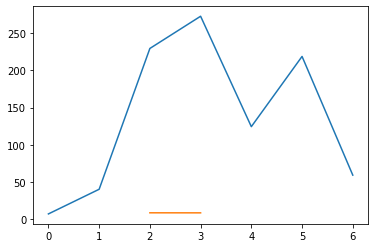

length of test data  3
shape of test data  (3, 1)
test data  [[0.4414425 ]
 [0.79670186]
 [0.19620753]]
reshape of data [[0.4414425  0.79670186 0.19620753]]
x_input  [[0.79670186 0.19620753]]
temp_input [0.7967018612277256, 0.1962075329402044]
[0.00522949]
3
1 day input [0.19620753 0.00522949]
1 day output [[0.0055546]]
2 day input [0.00522949 0.0055546 ]
2 day output [[0.00564681]]


             order_req_qty
demand_date               
2019-09-01        7.181818
2019-10-01       40.300000
2019-11-01      229.458333
2019-12-01      272.736842
2020-01-01      124.409091
2020-02-01      218.750000
2020-03-01       59.285714
-------------------------------
[[0.005229493137449026], [0.00555460387840867], [0.005646810866892338]]
df3
-------------------------------
[[8.57053635704095], [8.656871147634257], [8.681357176666946]]
[[0.        ]
 [1.        ]
 [0.43111435]
 [0.10889668]
 [0.08515883]
 [0.25961325]
 [0.15356907]]
[[0.        ]
 [1.        ]
 [0.43111435]
 [0.10889668]
 [0.0851588

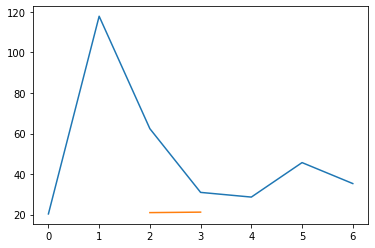

length of test data  3
shape of test data  (3, 1)
test data  [[0.08515883]
 [0.25961325]
 [0.15356907]]
reshape of data [[0.08515883 0.25961325 0.15356907]]
x_input  [[0.25961325 0.15356907]]
temp_input [0.2596132489555607, 0.15356907401857958]
[0.00620048]
3
1 day input [0.15356907 0.00620048]
1 day output [[0.00561979]]
2 day input [0.00620048 0.00561979]
2 day output [[0.00512442]]


             order_req_qty
demand_date               
2019-09-01       20.315789
2019-10-01      117.888889
2019-11-01       62.380952
2019-12-01       30.941176
2020-01-01       28.625000
2020-02-01       45.647059
2020-03-01       35.300000
-------------------------------
[[0.006200478877872229], [0.0056197913363575935], [0.005124418530613184]]
df3
-------------------------------
[[20.92078941565671], [20.864129932439333], [20.815794872416845]]
[[0.        ]
 [0.61823352]
 [0.35148198]
 [0.47011565]
 [0.27014273]
 [0.4410567 ]
 [1.        ]]
[[0.        ]
 [0.61823352]
 [0.35148198]
 [0.47011565]
 [0.

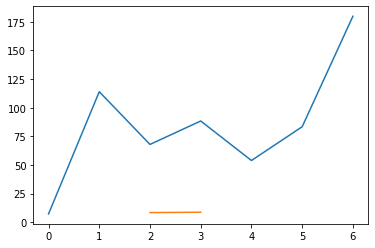

length of test data  3
shape of test data  (3, 1)
test data  [[0.27014273]
 [0.4410567 ]
 [1.        ]]
reshape of data [[0.27014273 0.4410567  1.        ]]
x_input  [[0.4410567 1.       ]]
temp_input [0.44105670071159836, 1.0]
[0.00909365]
3
1 day input [1.         0.00909365]
1 day output [[0.0096427]]
2 day input [0.00909365 0.0096427 ]
2 day output [[0.00567088]]


             order_req_qty
demand_date               
2019-09-01        7.266667
2019-10-01      114.000000
2019-11-01       67.947368
2019-12-01       88.428571
2020-01-01       53.904762
2020-02-01       83.411765
2020-03-01      179.909091
-------------------------------
[[0.00909364502876997], [0.009642703458666801], [0.0056708818301558495]]
df3
-------------------------------
[[8.836615589633583], [8.931406368021712], [8.245701453417087]]


In [32]:
for key in all_dataframes:
    # print(key, all_dataframes[key])
    df_t = all_dataframes[key]
    scaler=MinMaxScaler(feature_range=(0,1))
    df_t=scaler.fit_transform(np.array(df_t).reshape(-1,1))
    
    print(df_t)
    df_t=preprocess_data(df_t)
    print(df_t)
    training_size = int(len(df_t)*0.65)
    test_size = len(df_t) - training_size
    train_data,test_data = df_t[0:training_size,:],df_t[training_size:len(df_t),:1]
    #print(training_size)
    #print(test_size)
    #print(train_data)
    #print(test_data)
    
    n_steps = 2
    X_train, y_train = create_dataset(train_data, n_steps)
    X_test, y_test = create_dataset(test_data, n_steps)
    
    #print("X_train",X_train)
    #print("X_test",X_test)
    #print("y_train",y_train)
    #print("y_test",y_test)
    
    n_features = 1
    X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
    
    #print('-----reshape-----')
    #print("X_train",X_train)
    #print("X_test",X_test)
    #print("y_train",y_train)
    #print("y_test",y_test)
    
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(2,1)))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')

    #model.summary()
    
    model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1,verbose=0)
    
    ### Lets Do the prediction and check performance metrics
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)
    
    
    ##Transformback to original form
    train_predict=scaler.inverse_transform(train_predict)
    test_predict=scaler.inverse_transform(test_predict)
    
    print('train_predict',train_predict)
    print('test_predict',test_predict)
    
    metrics_print(y_train,train_predict,y_test,test_predict)
    
    
    ## Plotting 
    # shift train predictions for plotting
    look_back=2
    trainPredictPlot = np.empty_like(df_t)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
    
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(df_t)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_t)-1, :] = test_predict
    
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(df_t))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()
   
    #print(trainPredictPlot)
    #print(testPredictPlot)
    
    #demonstrate prediction for next 1 month
    x_input = test_data[1:].reshape((1,-1))
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
   
    print("length of test data ",len(test_data))
    print("shape of test data ",test_data.shape)
    print("test data ",test_data)
    print("reshape of data",test_data.reshape((1,-1)))
    print("x_input ",x_input)
    print("temp_input",temp_input)
    
    lst_output=[]
    i=0
    n=3
    n_steps=2
    while(i<n):
        if(len(temp_input)>2):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    print('\n')
    print(all_dataframes[key])
    print('-------------------------------')
    print(lst_output)
  
    df3=scaler.inverse_transform(lst_output).tolist()
    print('df3')
    print('-------------------------------')
    print(df3)
    
  

# Visualizaing The Output

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

In [35]:
timeseries_data

NameError: name 'timeseries_data' is not defined

In [ ]:
lst_output

In [ ]:
plt.plot(timeseries_data,label='actual_data')
plt.plot(lst_output, label='predicted_data')
plt.legend()
